In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sportsref.baseball import Season
#thanks to u/double_dose_larry for providing a sports reference library. 
#You can install it by running a cell with the following code (without the hashtag):
# !pip install git+https://github.com/double-dose-larry/sportsref
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline

Available tables: ['standings_E', 'standings_C', 'standings_W', 'expanded_standings_overall']


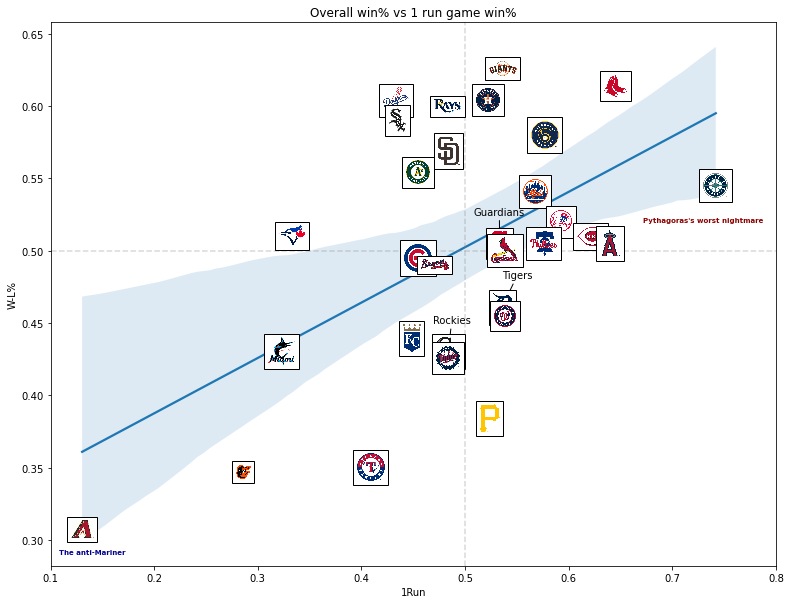

In [49]:
dimensions = (13, 10)
fig, ax = plt.subplots(figsize = dimensions)

season21 = Season(2021)
standings = season21.standings().get_df('expanded_standings_overall')
standings.drop(standings[standings['Tm']=='Average'].index.values, inplace = True)
for record in standings['1Run']:
    if type(record) == type(4.0):
        pass
    else:
        split = str(record).split('-')
        winpct = int(split[0]) / (int(split[0]) + int(split[1]))
        standings.replace(to_replace = record, value = winpct, inplace = True)
        
graph = sns.regplot(ax = ax, x = '1Run', y = 'W-L%', data = standings)
ax.set_xlim([0.1, 0.8])
plt.axvline(x = 0.5, ls = '--', color = 'gray', alpha = 0.3)
plt.axhline(y = 0.5, ls = '--', color = 'gray', alpha = 0.3)

#add images here
def images(dfname, xcol, ycol, graph_name):
    for team in dfname['Tm']:
        arr_img = plt.imread(team + '.png')
        imagebox = OffsetImage(arr_img, zoom = 0.03)
        ab = AnnotationBbox(imagebox, [(dfname.loc[dfname[dfname['Tm']==team].index.values][xcol]), 
                                    (dfname.loc[dfname[dfname['Tm']==team].index.values][ycol])])
        graph_name.add_artist(ab)
        
images(standings, '1Run', 'W-L%', graph)

#annotations
def annotation(annotationtxt, dfname, team, xcol, ycol, locationx, locationy, size):
    graph.annotate(annotationtxt, (dfname.loc[dfname[dfname['Tm']==team].index.values][xcol],
                             dfname.loc[dfname[dfname['Tm']==team].index.values][ycol]),
               xytext = (dfname.loc[dfname[dfname['Tm']==team].index.values][xcol]+ locationx,
                             dfname.loc[dfname[dfname['Tm']==team].index.values][ycol]+ locationy), 
               arrowprops = dict(arrowstyle = '->'),
               size = size)

annotation('Tigers', standings, 'Detroit Tigers', '1Run', 'W-L%', 0, 0.02, 10)
annotation('Rockies', standings, 'Colorado Rockies', '1Run', 'W-L%', -0.015, 0.02, 10)
annotation('Guardians', standings, 'Cleveland Indians', '1Run', 'W-L%', -0.025, 0.02, 10)

plt.text(0.73, 0.52, "Pythagoras's worst nightmare", horizontalalignment='center', size= 7, color='darkred', weight='semibold')
plt.text(0.14, 0.29, "The anti-Mariner", horizontalalignment = 'center', size = 7, color = 'darkblue', weight = 'semibold')
ax.set_title('Overall win% vs 1 run game win%')
plt.savefig('overall winpct vs 1run winpct.png', dpi = 500)